<a href="https://colab.research.google.com/github/ssandeep630241/image-classification-for-food/blob/main/DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
install.packages("Hmisc")
install.packages("lattice")
install.packages("survival")
install.packages("Formula")
install.packages("ggplot2")
library(Hmisc)
library(lattice)
library(survival)
library(Formula)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




In [ ]:
sdata <- read.csv("/content/cp.csv",header=TRUE)
#View(sdata) # view total data
summary(sdata) #data summary
dim(sdata) # dimension of the data
names(sdata) # display header of the data


      S.No              CA              MG              SO4        
 Min.   :   1.0   Min.   :1.001   Min.   :0.5024   Min.   :0.3014  
 1st Qu.: 250.8   1st Qu.:1.745   1st Qu.:0.8569   1st Qu.:0.4712  
 Median : 500.5   Median :2.491   Median :1.2726   Median :0.6541  
 Mean   : 500.5   Mean   :2.514   Mean   :1.2396   Mean   :0.6493  
 3rd Qu.: 750.2   3rd Qu.:3.300   3rd Qu.:1.5950   3rd Qu.:0.8288  
 Max.   :1000.0   Max.   :4.000   Max.   :1.9978   Max.   :0.9991  
       B                PH              Ec               N        
 Min.   :0.1005   Min.   :5.000   Min.   :0.1003   Min.   :2.000  
 1st Qu.:0.1990   1st Qu.:5.593   1st Qu.:0.2011   1st Qu.:2.537  
 Median :0.2894   Median :6.180   Median :0.2957   Median :3.051  
 Mean   :0.2961   Mean   :6.215   Mean   :0.2988   Mean   :3.028  
 3rd Qu.:0.3949   3rd Qu.:6.811   3rd Qu.:0.3988   3rd Qu.:3.498  
 Max.   :0.4991   Max.   :7.499   Max.   :0.4997   Max.   :4.000  
       P               K             crop              

[1] 1000   25

[1] "S.No"  "CA"    "MG"    "SO4"   "B"     "PH"    "Ec"    "N"     "P"    
[10] "K"     "crop"  "N.1"   "P2O5"  "K2O"   "UREA"  "S.P"   "MP"    "FE"   
[19] "ZN"    "MN"    "CU"    "FES04" "ZUS04" "NUSO4" "CUSO4"

[1] 1.000794 3.999691

[1] 2.513635

0%      25%      50%      75%     100% 
1.000794 1.744647 2.490777 3.299911 3.999691

[1] 0.7669765

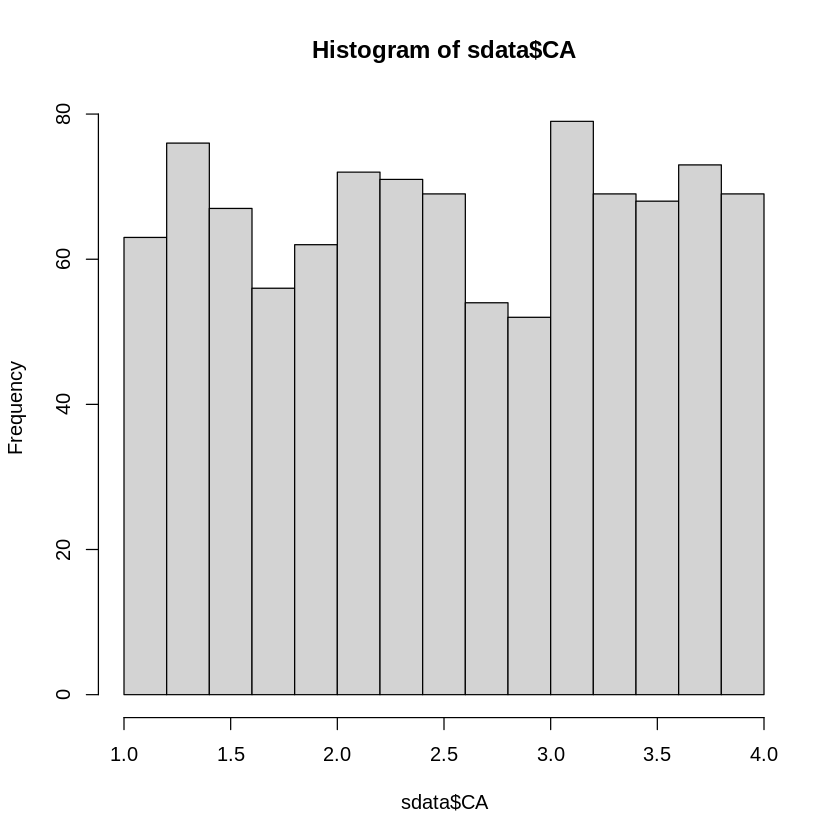

In [13]:
range(sdata$CA) #range
mean(sdata$CA)
quantile(sdata$CA) #Quartiles and percentiles
var(sdata$CA)
hist(sdata$CA)


In [29]:
install.packages("magrittr")
library(magrittr)
install.packages("dplyr")
library(dplyr)
install.packages("scatterplot3d")
library(scatterplot3d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



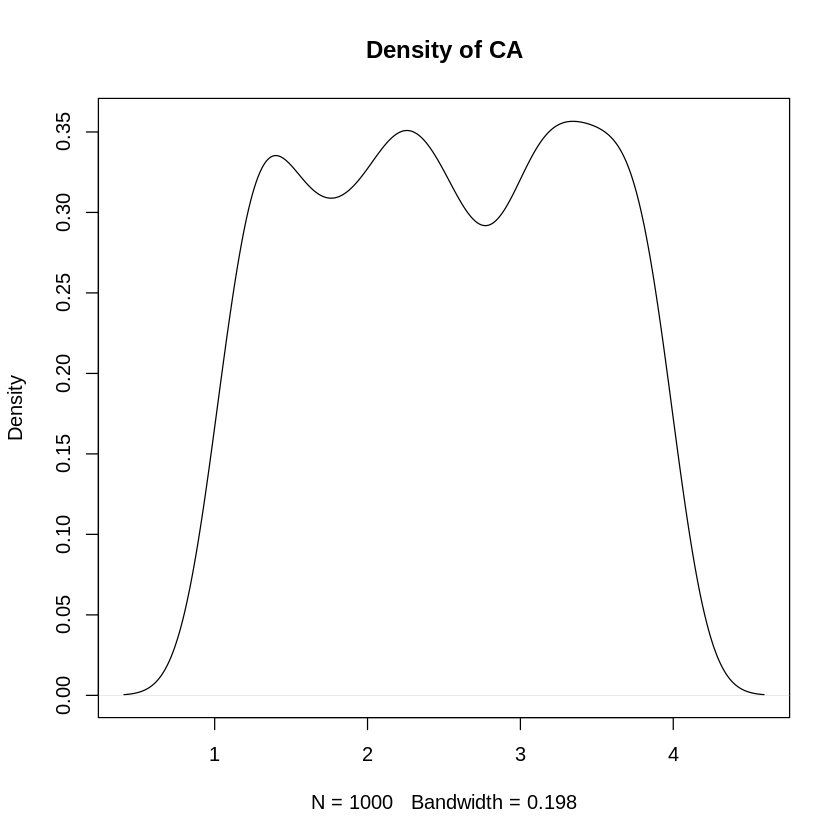

In [16]:
sdata$CA %>% density() %>%
plot(main='Density of CA')

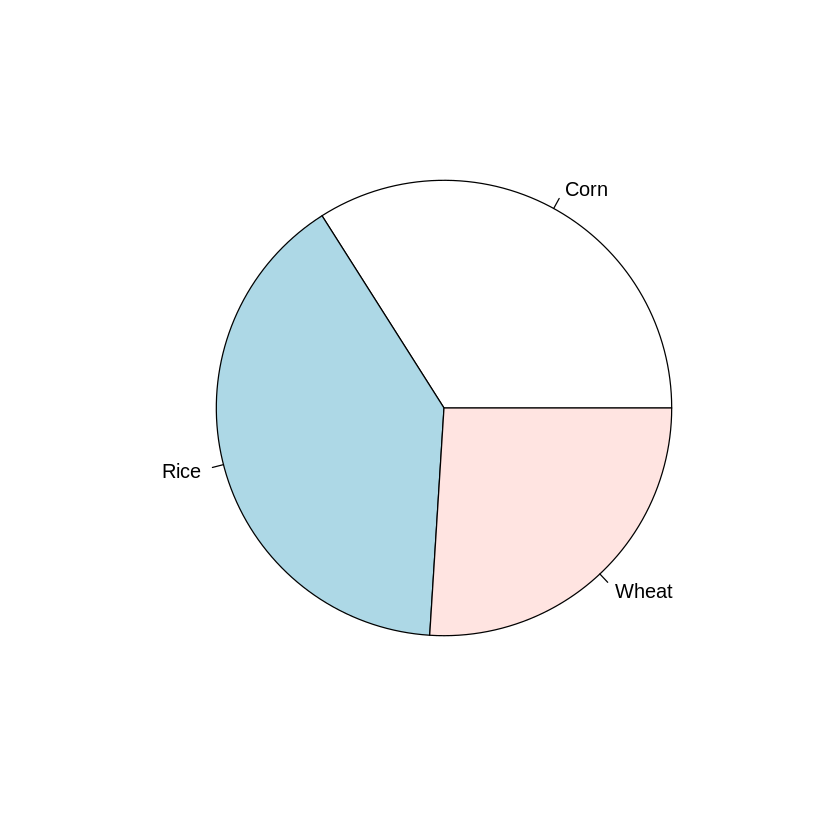

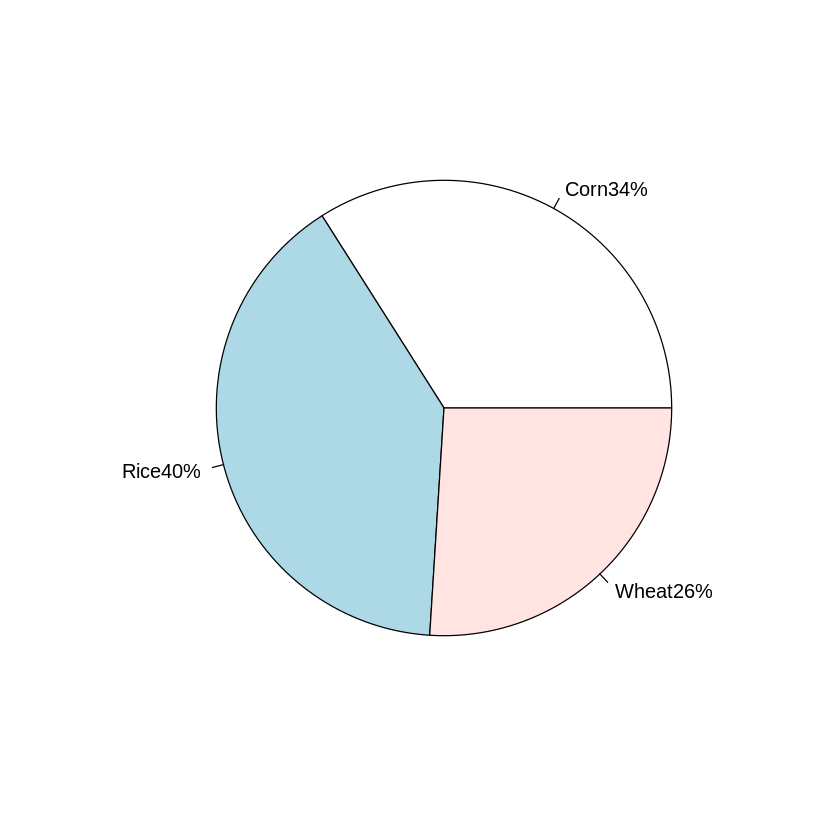

In [19]:
sdata2 <- sdata %>% sample_n(50)
sdata2$crop %>% table() %>% pie()
tab <- sdata2$crop %>% table()
precentages <- tab %>% prop.table() %>% round(3) * 100
txt <- paste0(names(tab), '', precentages, '%')
pie(tab, labels=txt)

In [22]:
cov(sdata$CA, sdata$PH)	 # covariance
cor(sdata$CA, sdata$PH)	# correlation
cov(sdata[, 2:10])	# correlation of 10 column

[1] -0.01565376

[1] -0.02483889

,CA,MG,SO4,B,PH,Ec,N,P,K
CA,0.766976478,6.298695e-03,-0.0060735722,-0.0053097717,-0.0156537576,2.282584e-03,-0.0118158594,0.0082020177,0.0060578936
MG,0.006298695,1.848816e-01,-0.0040565413,0.0017814434,-0.0007413857,6.088353e-05,-0.0071203569,-0.0065869454,0.0002374106
SO4,-0.006073572,-4.056541e-03,0.0409846650,0.0006867099,-0.0029025993,-1.001868e-03,0.0001446153,0.0005789074,-0.0041928433
B,-0.005309772,1.781443e-03,0.0006867099,0.0132090086,-0.0003765123,-2.532204e-04,-0.0023672584,-0.0001811079,-0.0009175110
PH,-0.015653758,-7.413857e-04,-0.0029025993,-0.0003765123,0.5178341228,-6.566498e-04,-0.0006643200,-0.0027832441,-0.0052068961
Ec,0.002282584,6.088353e-05,-0.0010018678,-0.0002532204,-0.0006566498,1.348344e-02,0.0019729875,0.0021570580,0.0008650233
N,-0.011815859,-7.120357e-03,0.0001446153,-0.0023672584,-0.0006643200,1.972988e-03,0.3314136547,-0.0079212381,0.0039258998
P,0.008202018,-6.586945e-03,0.0005789074,-0.0001811079,-0.0027832441,2.157058e-03,-0.0079212381,0.0855554639,0.0032887851
K,0.006057894,2.374106e-04,-0.0041928433,-0.0009175110,-0.0052068961,8.650233e-04,0.0039258998,0.0032887851,0.1936382578


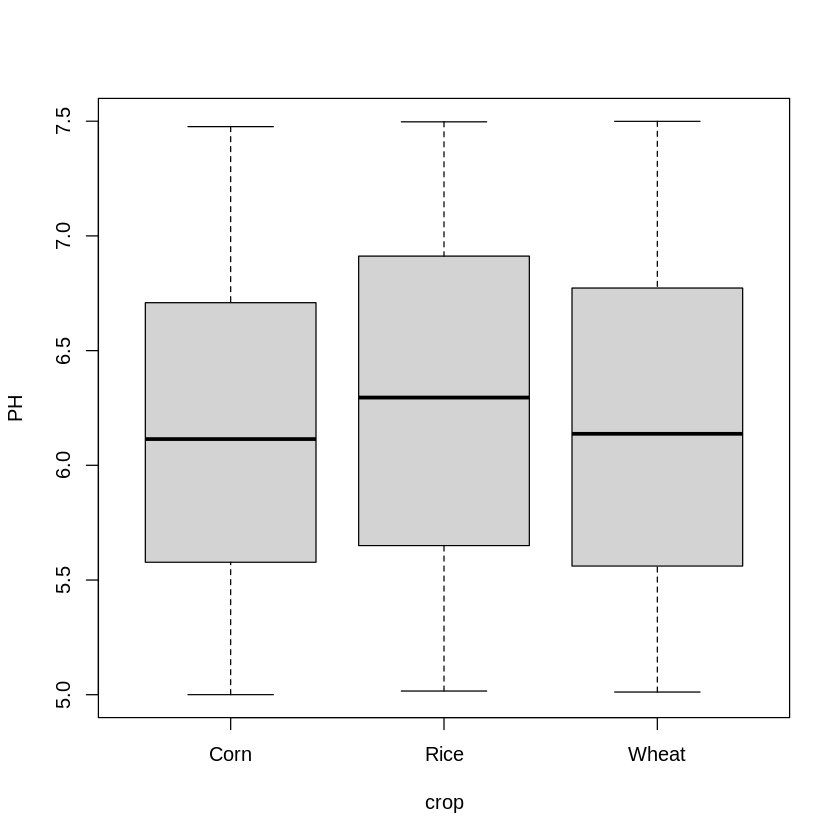

In [23]:
boxplot(PH ~ crop, data = sdata)

Warning message in plot.xy(xy, type, ...):
“NAs introduced by coercion”


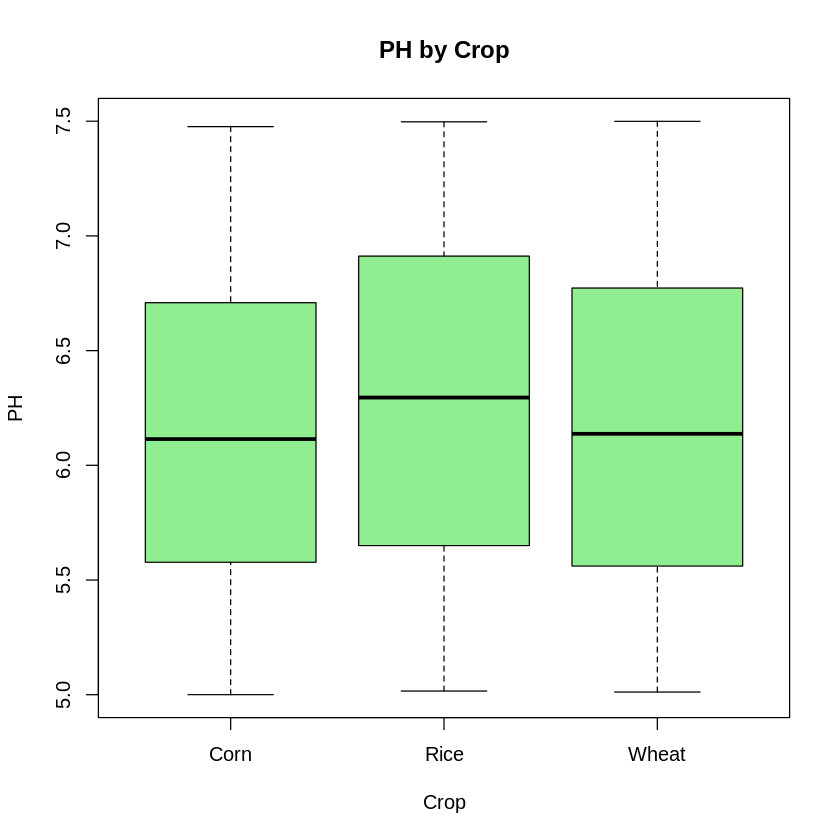

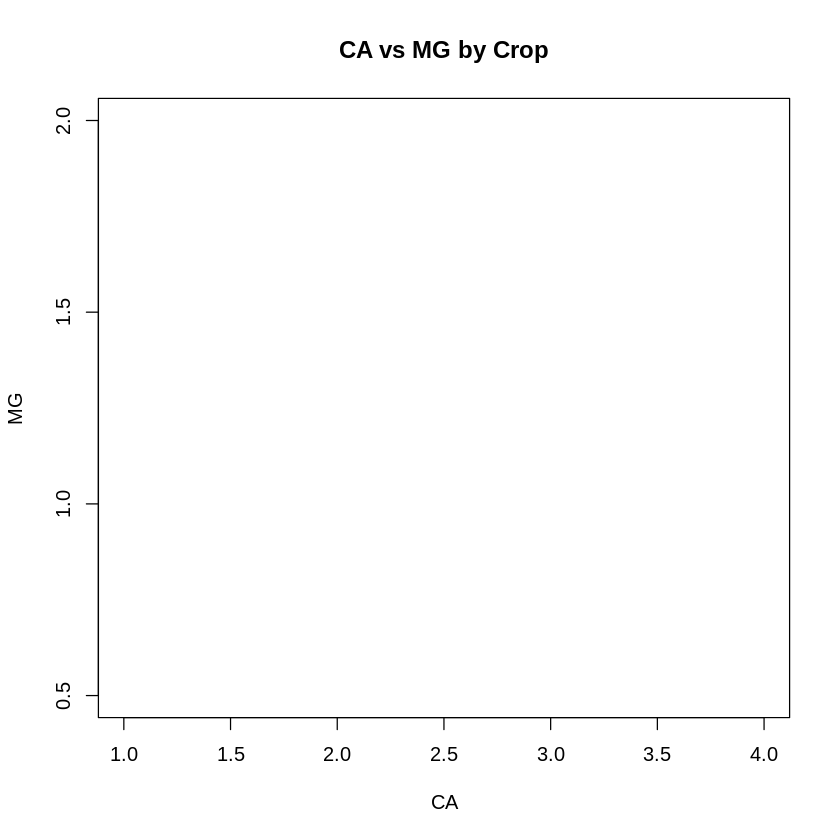

In [26]:
boxplot(PH ~ crop, data = sdata, main = "PH by Crop", xlab = "Crop", ylab = "PH", col = "lightgreen")

# Scatter plot of 'CA' vs 'MG', colored by 'crop'



      S.No              CA              MG              SO4        
 Min.   :   1.0   Min.   :1.001   Min.   :0.5024   Min.   :0.3014  
 1st Qu.: 250.8   1st Qu.:1.745   1st Qu.:0.8569   1st Qu.:0.4712  
 Median : 500.5   Median :2.491   Median :1.2726   Median :0.6541  
 Mean   : 500.5   Mean   :2.514   Mean   :1.2396   Mean   :0.6493  
 3rd Qu.: 750.2   3rd Qu.:3.300   3rd Qu.:1.5950   3rd Qu.:0.8288  
 Max.   :1000.0   Max.   :4.000   Max.   :1.9978   Max.   :0.9991  
       B                PH              Ec               N        
 Min.   :0.1005   Min.   :5.000   Min.   :0.1003   Min.   :2.000  
 1st Qu.:0.1990   1st Qu.:5.593   1st Qu.:0.2011   1st Qu.:2.537  
 Median :0.2894   Median :6.180   Median :0.2957   Median :3.051  
 Mean   :0.2961   Mean   :6.215   Mean   :0.2988   Mean   :3.028  
 3rd Qu.:0.3949   3rd Qu.:6.811   3rd Qu.:0.3988   3rd Qu.:3.498  
 Max.   :0.4991   Max.   :7.499   Max.   :0.4997   Max.   :4.000  
       P               K            crop          N.1  

[1] 1000   25

[1] "S.No"  "CA"    "MG"    "SO4"   "B"     "PH"    "Ec"    "N"     "P"    
[10] "K"     "crop"  "N.1"   "P2O5"  "K2O"   "UREA"  "S.P"   "MP"    "FE"   
[19] "ZN"    "MN"    "CU"    "FES04" "ZUS04" "NUSO4" "CUSO4"

[1] 1.000794 3.999691

[1] 2.513635

0%      25%      50%      75%     100% 
1.000794 1.744647 2.490777 3.299911 3.999691

[1] 0.7669765

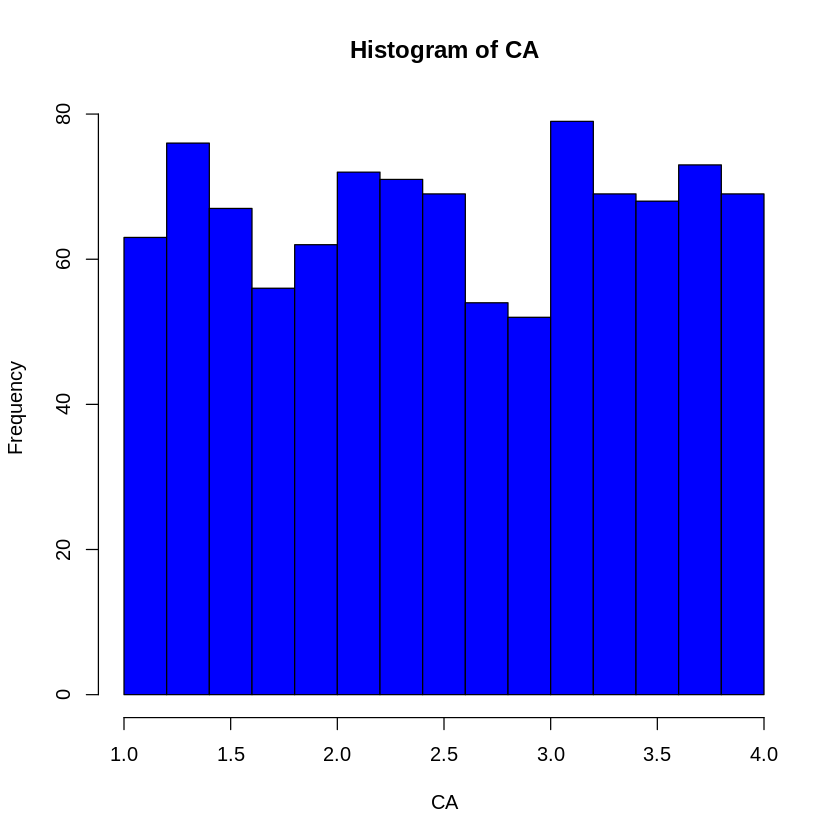

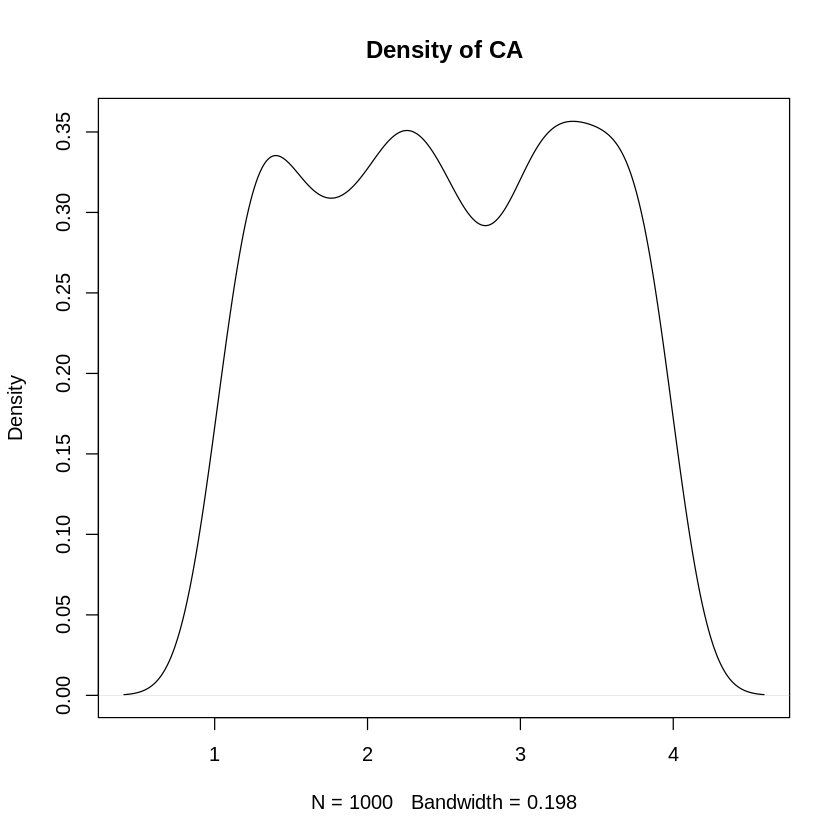

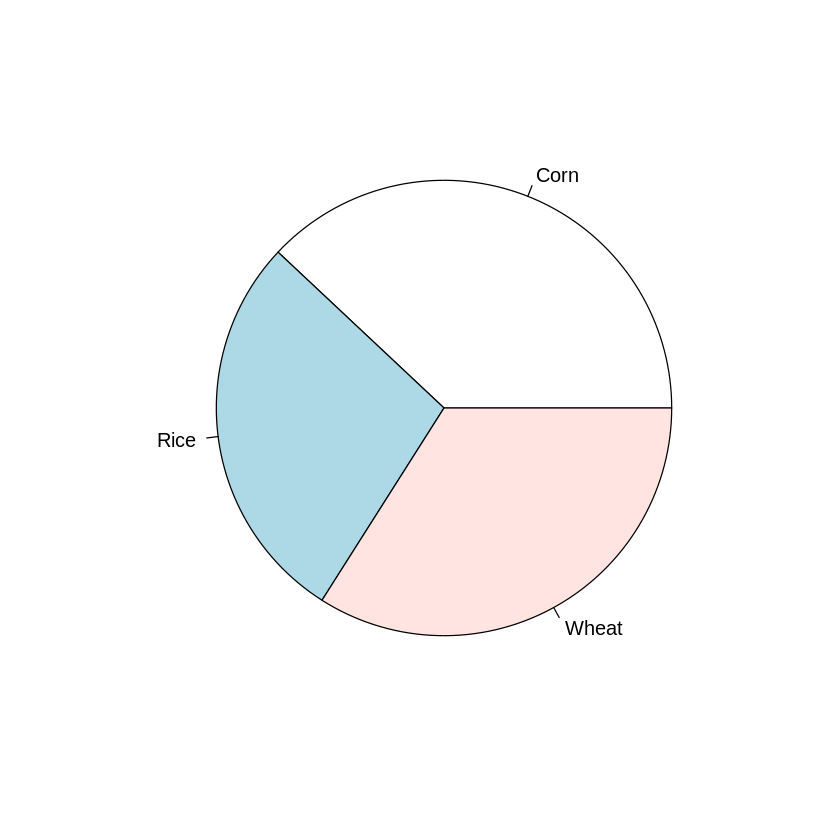

[1] -0.01565376

[1] -0.02483889

,CA,MG,SO4,B,PH,Ec,N,P,K
CA,0.766976478,6.298695e-03,-0.0060735722,-0.0053097717,-0.0156537576,2.282584e-03,-0.0118158594,0.0082020177,0.0060578936
MG,0.006298695,1.848816e-01,-0.0040565413,0.0017814434,-0.0007413857,6.088353e-05,-0.0071203569,-0.0065869454,0.0002374106
SO4,-0.006073572,-4.056541e-03,0.0409846650,0.0006867099,-0.0029025993,-1.001868e-03,0.0001446153,0.0005789074,-0.0041928433
B,-0.005309772,1.781443e-03,0.0006867099,0.0132090086,-0.0003765123,-2.532204e-04,-0.0023672584,-0.0001811079,-0.0009175110
PH,-0.015653758,-7.413857e-04,-0.0029025993,-0.0003765123,0.5178341228,-6.566498e-04,-0.0006643200,-0.0027832441,-0.0052068961
Ec,0.002282584,6.088353e-05,-0.0010018678,-0.0002532204,-0.0006566498,1.348344e-02,0.0019729875,0.0021570580,0.0008650233
N,-0.011815859,-7.120357e-03,0.0001446153,-0.0023672584,-0.0006643200,1.972988e-03,0.3314136547,-0.0079212381,0.0039258998
P,0.008202018,-6.586945e-03,0.0005789074,-0.0001811079,-0.0027832441,2.157058e-03,-0.0079212381,0.0855554639,0.0032887851
K,0.006057894,2.374106e-04,-0.0041928433,-0.0009175110,-0.0052068961,8.650233e-04,0.0039258998,0.0032887851,0.1936382578


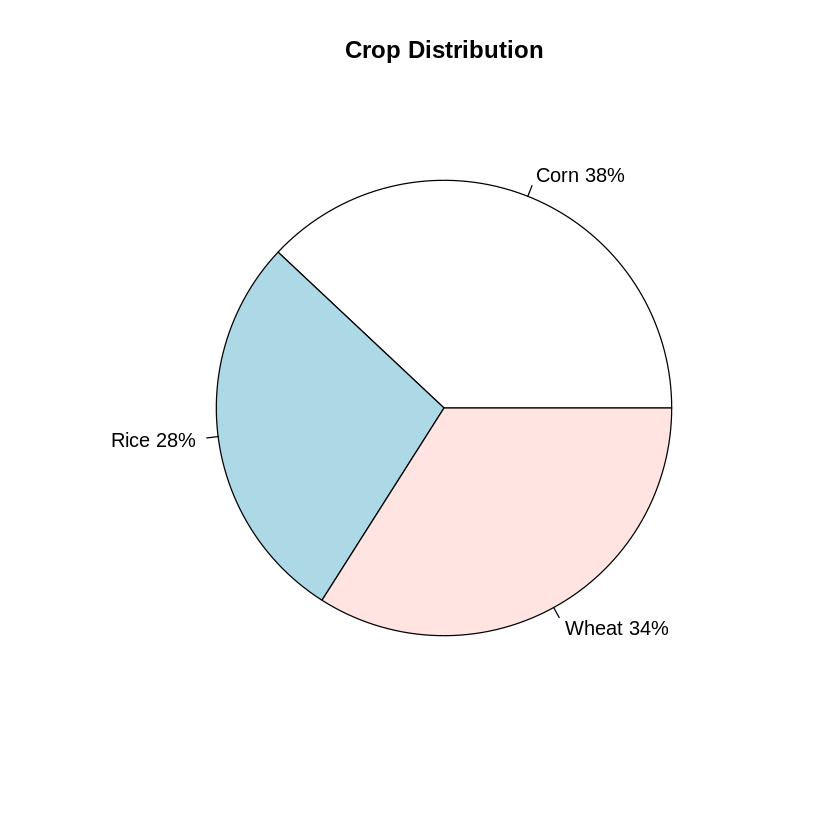

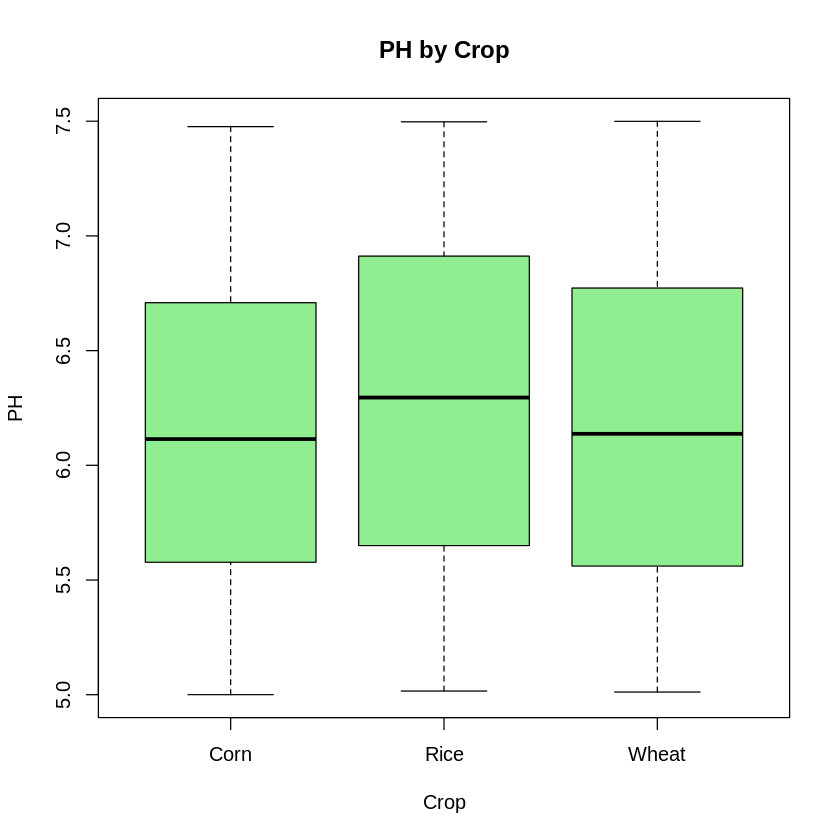

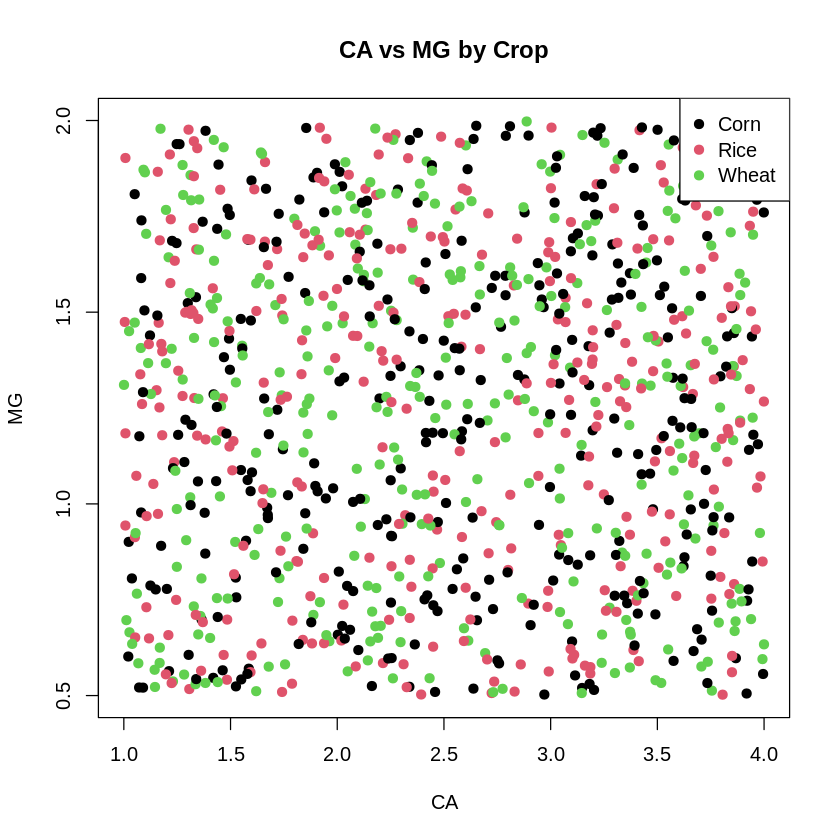

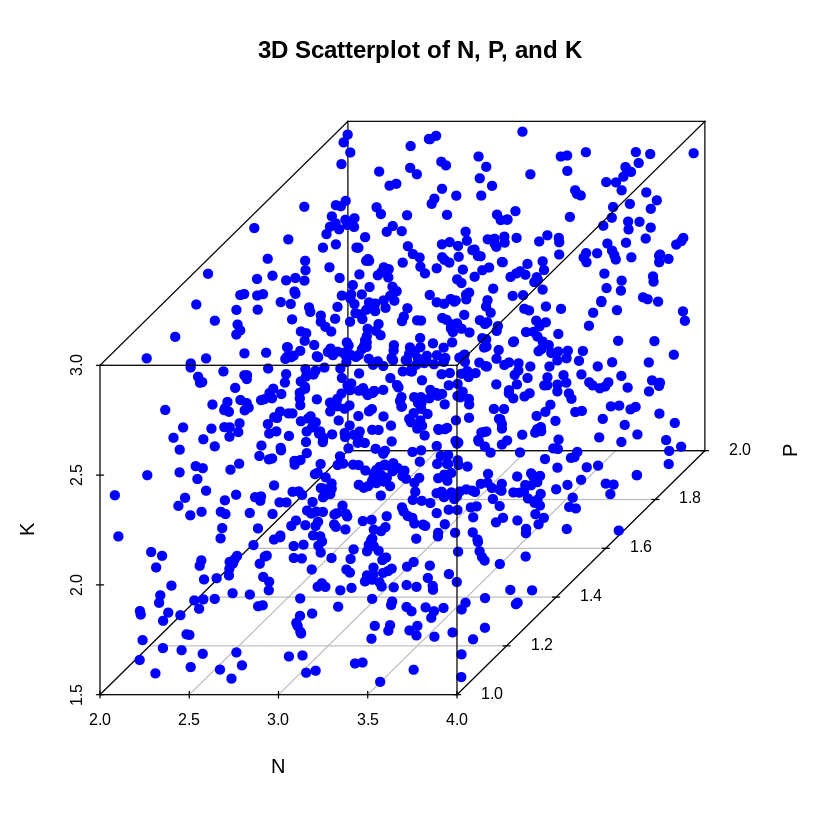

In [37]:
sdata <- read.csv("/content/cp.csv", header = TRUE)

# Ensure 'crop' is a factor
sdata$crop <- as.factor(sdata$crop)

# Check for missing values and handle them
sdata <- na.omit(sdata)

# View the data (use this in an interactive R session, not in scripts)
#View(sdata)

# Data summary
summary(sdata)

# Dimension of the data
dim(sdata)

# Display the header (column names) of the data
names(sdata)

# Range of the 'CA' column
range(sdata$CA)

# Mean of the 'CA' column
mean(sdata$CA)

# Quartiles and percentiles of the 'CA' column
quantile(sdata$CA)

# Variance of the 'CA' column
var(sdata$CA)

# Histogram of the 'CA' column
hist(sdata$CA, main = "Histogram of CA", xlab = "CA", col = "blue", border = "black")

# Density plot of the 'CA' column
sdata$CA %>% density() %>%
  plot(main = "Density of CA")

# Sample 50 random rows from the data
sdata2 <- sdata %>% sample_n(50)

# Pie chart of the 'crop' column
sdata2$crop %>% table() %>% pie()

# Calculate percentages for the pie chart
tab <- sdata2$crop %>% table()
percentages <- tab %>% prop.table() %>% round(3) * 100
txt <- paste0(names(tab), " ", percentages, "%")
pie(tab, labels = txt, main = "Crop Distribution")

# Covariance between 'CA' and 'PH' columns
cov(sdata$CA, sdata$PH)

# Correlation between 'CA' and 'PH' columns
cor(sdata$CA, sdata$PH)

# Covariance matrix for columns 2 to 10
cov(sdata[, 2:10])

# Boxplot of 'PH' by 'crop'
boxplot(PH ~ crop, data = sdata, main = "PH by Crop", xlab = "Crop", ylab = "PH", col = "lightgreen")

# Scatter plot of 'CA' vs 'MG', colored by 'crop'
with(sdata, plot(CA, MG, col = as.numeric(crop), pch = 19, main = "CA vs MG by Crop", xlab = "CA", ylab = "MG"))

# Legend for the scatter plot
legend("topright", legend = levels(sdata$crop), col = 1:length(levels(sdata$crop)), pch = 19)

# 3D scatter plot of 'N', 'P', and 'K' columns
scatterplot3d(sdata$N, sdata$P, sdata$K, main = "3D Scatterplot of N, P, and K", xlab = "N", ylab = "P", zlab = "K", color = "blue", pch = 19)
# Check the dimensions of the data




[1] 1000   25

,S.No,CA,MG,SO4,B,PH,Ec,N,P,K,⋯,S.P,MP,FE,ZN,MN,CU,FES04,ZUS04,NUSO4,CUSO4
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1.450253,1.0194732,0.4508255,0.2492427,7.499408,0.1567208,2.659867,1.335299,2.372686,⋯,1.675412,1.919503,0.02253768,0.01656195,0.02983757,0.02068216,0.05476572,0.06753565,0.07585172,0.07509329
2,2,3.616671,1.4894530,0.3663350,0.2178275,6.093896,0.4121740,3.980490,1.137202,2.312358,⋯,1.377416,1.749024,0.01803133,0.01767667,0.02565973,0.02038677,0.03291398,0.04810030,0.07894902,0.07703670
3,3,1.841894,1.1342632,0.3298905,0.3713338,6.596284,0.3924937,2.332053,1.180599,1.824177,⋯,1.721594,1.545002,0.01225165,0.01256512,0.02553414,0.02797004,0.04283093,0.05454242,0.07924339,0.08790223
4,4,1.081308,1.5889525,0.7176128,0.4373793,5.671504,0.1549625,3.342544,1.097239,2.334258,⋯,1.669685,1.743812,0.02798149,0.01744480,0.02427323,0.02450948,0.05538276,0.04025649,0.06044273,0.06394346
5,5,1.007493,1.9022292,0.3841723,0.4201952,6.796628,0.4609853,3.930452,1.163199,1.758622,⋯,1.722916,1.843504,0.01757232,0.02510565,0.01131104,0.01977473,0.05283193,0.04641368,0.07722343,0.07720260
6,6,3.788149,0.9926909,0.9351047,0.1576509,5.195824,0.4480158,2.783292,1.922776,1.920939,⋯,1.821367,1.018099,0.02855801,0.02829637,0.01699202,0.02938890,0.04646819,0.06919177,0.07956285,0.07158072
7,7,1.306777,0.5169671,0.8987554,0.4202793,5.539473,0.2011274,3.413095,1.914686,2.004160,⋯,1.955563,1.109926,0.01171422,0.02400733,0.01447362,0.02243087,0.04031415,0.05832389,0.06929679,0.08002645


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



       predict_unseen
        2.000470684 2.008004512 2.010737286 2.017124792 2.021341425 2.03391137
  Corn           99           0           0           0           0          0
  Rice          107           0           0           0           0          0
  Wheat          96           0           0           0           0          0
       predict_unseen
        2.034160045 2.037797694 2.040437467 2.049786231 2.054688429 2.059196219
  Corn            0           0           0           0           0           0
  Rice            0           0           0           0           0           0
  Wheat           0           0           0           0           0           0
       predict_unseen
        2.061551664 2.061627488 2.064658908 2.066739183 2.076459985 2.078863494
  Corn            0           0           0           0           0           0
  Rice            0           0           0           0           0           0
  Wheat           0           0           0           0   

[1] "Accuracy for test: 0.327814569536424"
         CP nsplit rel error   xerror       xstd
1 0.0114085      0 1.0000000 1.003076 0.03479558
2 0.0100000      3 0.9657745 1.042014 0.03782331


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



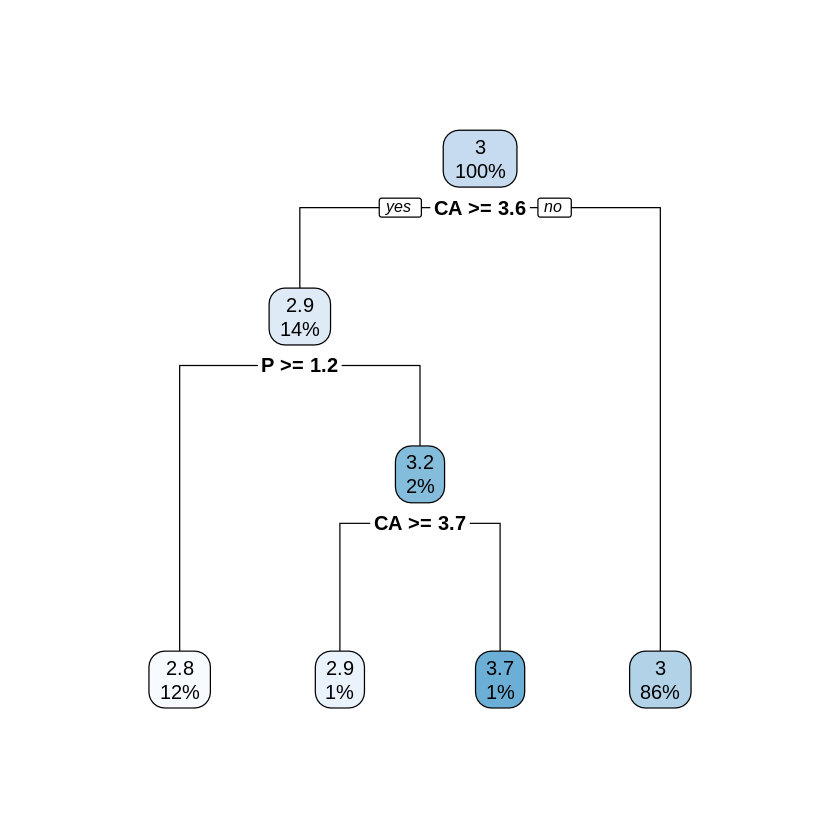

In [38]:
dim(sdata)

# Display the first 7 rows of the data
head(sdata, 7)

# Set seed for reproducibility
set.seed(1234)

# Create indices for splitting the data into training and test sets
ind <- sample(2, nrow(sdata), replace=TRUE, prob=c(0.7, 0.3))

# Split the data into training and test sets
sdata.train <- sdata[ind==1,]
sdata.test <- sdata[ind==2,]
install.packages("rpart")
library(rpart)

# Define the formula for the decision tree
myFormula <- N ~ P + CA + MG

# Train the decision tree model on the training data
sdata.rpart <- rpart(myFormula, data = sdata.train, control = rpart.control(minsplit = 10))

# Fit the decision tree model
fit <- rpart(myFormula, data = sdata.train, method = 'class')

# Make predictions on the test data
predict_unseen <- predict(fit, sdata.test, type = 'class')

# Create a confusion matrix
table_mat <- table(sdata.test$crop, predict_unseen)

# Display the confusion matrix
table_mat

# Calculate accuracy for the test set
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)

# Print the accuracy
print(paste('Accuracy for test:', accuracy_Test))

# Display the complexity parameter table
print(sdata.rpart$cptable)

# Load the library for plotting decision trees
install.packages("rpart.plot")
library(rpart.plot)

# Plot the decision tree
rpart.plot(sdata.rpart)

In [41]:
# Load the necessary library for decision tree
install.packages("C50")
library(C50)
# load data
# fit model
fit <- C5.0(crop~., data=sdata, trials=10)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, sdata)
# summarize accuracy
table(predictions, sdata$crop)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
C5.0.formula(formula = crop ~ ., data = sdata, trials = 10)

Classification Tree
Number of samples: 1000 
Number of predictors: 24 

Number of boosting iterations: 10 requested;  1 used due to early stopping

Non-standard options: attempt to group attributes



           
predictions Corn Rice Wheat
      Corn     0    0     0
      Rice     0    0     0
      Wheat  337  325   338

In [42]:
install.packages("ipred")
library(ipred)
# fit model
fit <- bagging(crop~., data=sdata)
# summarize the fit
summary(fit)
# make predictions
predictions <- predict(fit, sdata, type="class")
# summarize accuracy
table(predictions, sdata$crop)
summary(predictions)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’





Bagging classification trees with 25 bootstrap replications 

Call: bagging.data.frame(formula = crop ~ ., data = sdata)




$y
   [1] Wheat Rice  Wheat Corn  Rice  Wheat Rice  Wheat Wheat Rice  Corn  Wheat
  [13] Rice  Wheat Corn  Corn  Corn  Wheat Corn  Wheat Rice  Corn  Wheat Corn 
  [25] Rice  Wheat Corn  Rice  Corn  Wheat Rice  Wheat Wheat Corn  Rice  Wheat
  [37] Wheat Wheat Rice  Wheat Corn  Corn  Rice  Corn  Corn  Corn  Rice  Wheat
  [49] Wheat Corn  Corn  Wheat Rice  Corn  Corn  Rice  Rice  Rice  Wheat Rice 
  [61] Rice  Rice  Wheat Wheat Corn  Rice  Wheat Rice  Wheat Corn  Corn  Corn 
  [73] Wheat Wheat Wheat Corn  Corn  Rice  Wheat Rice  Rice  Corn  Wheat Rice 
  [85] Corn  Corn  Corn  Wheat Corn  Wheat Rice  Corn  Corn  Corn  Corn  Corn 
  [97] Wheat Wheat Wheat Corn  Rice  Corn  Rice  Corn  Corn  Rice  Wheat Rice 
 [109] Wheat Rice  Corn  Corn  Wheat Rice  Wheat Rice  Corn  Wheat Wheat Wheat
 [121] Wheat Corn  Rice  Wheat Corn  Corn  Wheat Rice  Rice  Corn  Wheat Wheat
 [133] Rice  Wheat Rice  Rice  Corn  Wheat Wheat Rice  Wheat Rice  Corn  Wheat
 [145] Rice  Wheat Corn  Wheat Rice  Wheat Corn  

           
predictions Corn Rice Wheat
      Corn   337    0     0
      Rice     0  325     0
      Wheat    0    0   338

Corn  Rice Wheat 
  337   325   338

In [45]:
install.packages("caret")
library(caret) # Load the caret library for confusionMatrix function

fit <- bagging(crop~., data=sdata)
# summarize the fit
summary(fit)
# make predictions
predictions <- predict(fit, sdata, type="class")
# summarize accuracy
table(predictions, sdata$crop)
summary(predictions)

# Example usage of confusionMatrix (replace with your actual data)
lvs <- c("positive", "negative")
truth <- factor(rep(lvs, times = c(30, 2000)),
                levels = rev(lvs))
pred <- factor( c(
  rep(lvs, times = c(20, 10)),
  rep(lvs, times = c(180, 1820))),levels = rev(lvs))
xtab <- table(pred, truth)
print(confusionMatrix(xtab[2:1,2:1]))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’



Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster





Bagging classification trees with 25 bootstrap replications 

Call: bagging.data.frame(formula = crop ~ ., data = sdata)




$y
   [1] Wheat Rice  Wheat Corn  Rice  Wheat Rice  Wheat Wheat Rice  Corn  Wheat
  [13] Rice  Wheat Corn  Corn  Corn  Wheat Corn  Wheat Rice  Corn  Wheat Corn 
  [25] Rice  Wheat Corn  Rice  Corn  Wheat Rice  Wheat Wheat Corn  Rice  Wheat
  [37] Wheat Wheat Rice  Wheat Corn  Corn  Rice  Corn  Corn  Corn  Rice  Wheat
  [49] Wheat Corn  Corn  Wheat Rice  Corn  Corn  Rice  Rice  Rice  Wheat Rice 
  [61] Rice  Rice  Wheat Wheat Corn  Rice  Wheat Rice  Wheat Corn  Corn  Corn 
  [73] Wheat Wheat Wheat Corn  Corn  Rice  Wheat Rice  Rice  Corn  Wheat Rice 
  [85] Corn  Corn  Corn  Wheat Corn  Wheat Rice  Corn  Corn  Corn  Corn  Corn 
  [97] Wheat Wheat Wheat Corn  Rice  Corn  Rice  Corn  Corn  Rice  Wheat Rice 
 [109] Wheat Rice  Corn  Corn  Wheat Rice  Wheat Rice  Corn  Wheat Wheat Wheat
 [121] Wheat Corn  Rice  Wheat Corn  Corn  Wheat Rice  Rice  Corn  Wheat Wheat
 [133] Rice  Wheat Rice  Rice  Corn  Wheat Wheat Rice  Wheat Rice  Corn  Wheat
 [145] Rice  Wheat Corn  Wheat Rice  Wheat Corn  

           
predictions Corn Rice Wheat
      Corn   337    0     0
      Rice     0  325     0
      Wheat    0    0   338

Corn  Rice Wheat 
  337   325   338

Confusion Matrix and Statistics

          truth
pred       positive negative
  positive       20      180
  negative       10     1820
                                          
               Accuracy : 0.9064          
                 95% CI : (0.8929, 0.9187)
    No Information Rate : 0.9852          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1521          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.666667        
            Specificity : 0.910000        
         Pos Pred Value : 0.100000        
         Neg Pred Value : 0.994536        
             Prevalence : 0.014778        
         Detection Rate : 0.009852        
   Detection Prevalence : 0.098522        
      Balanced Accuracy : 0.788333        
                                          
       'Positive' Class : positive        
    